/tmp/ipython-input-1938315702.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time = pd.date_range(start='2015-01-01', periods=100, freq='M')


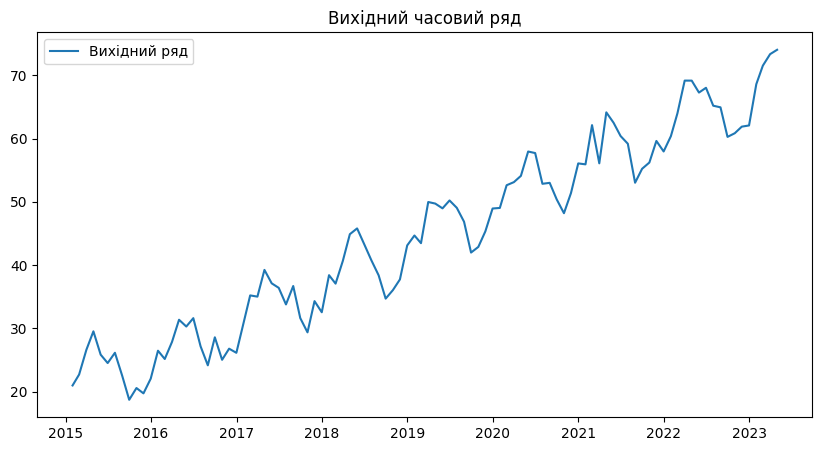

ADF статистика: 0.4805989100677209
p-value: 0.9842713329404886
Ряд не є стаціонарним


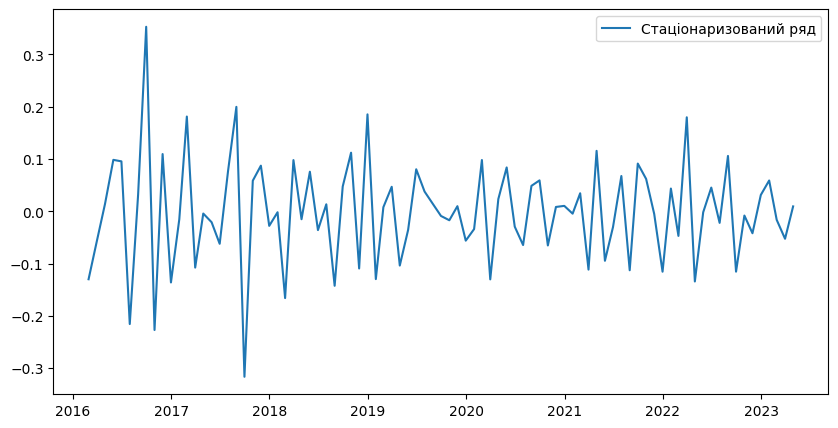

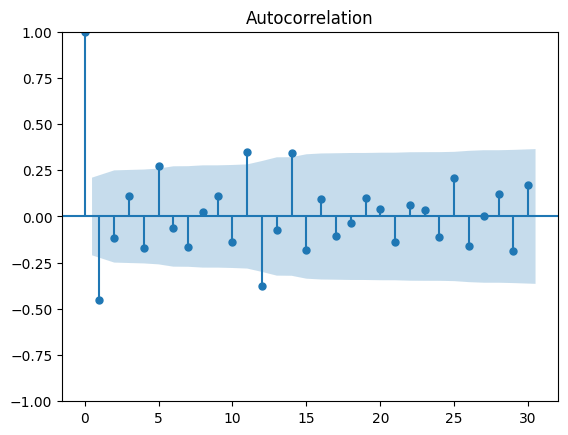

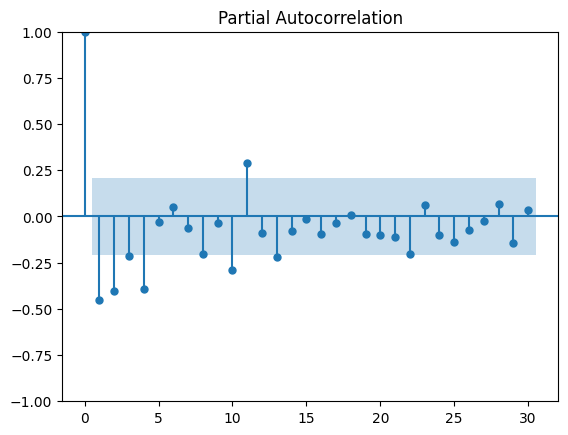

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                                log   No. Observations:                  100
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 112.563
Date:                            Wed, 22 Oct 2025   AIC                           -215.126
Time:                                    13:02:39   BIC                           -202.796
Sample:                                01-31-2015   HQIC                          -210.161
                                     - 04-30-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0233      0.187     -0.124      0.901      -0.390       0.344
ma.L1         -0.7963      0.110   

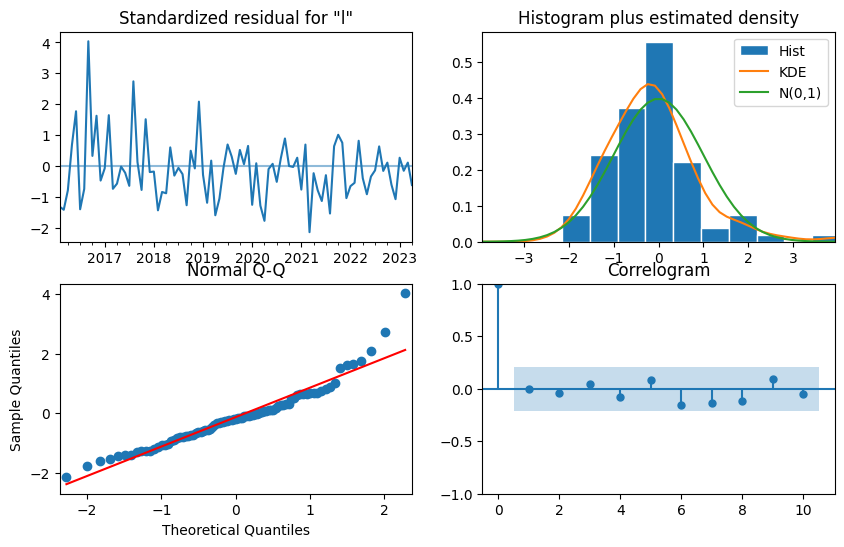

/tmp/ipython-input-1938315702.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_df['Дата'] = pd.date_range(data.index[-1], periods=11, freq='M')[1:]


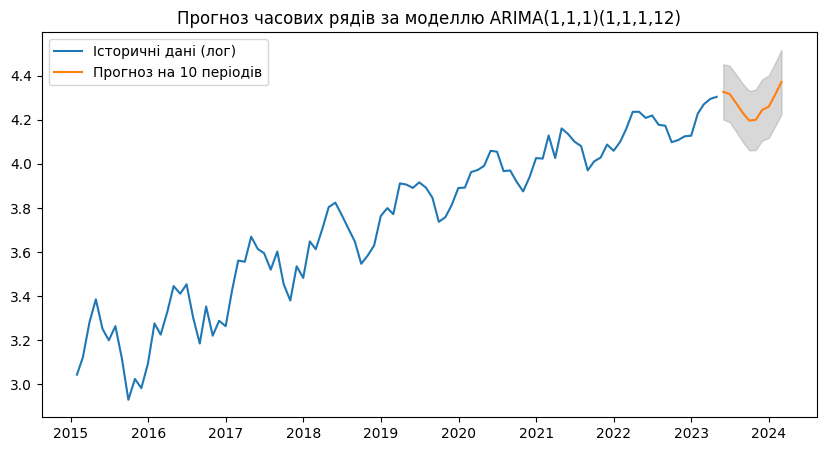


Прогнозні значення (у логарифмах):
Дата
2023-05-31    4.326838
2023-06-30    4.317598
2023-07-31    4.275365
2023-08-31    4.231204
2023-09-30    4.196608
2023-10-31    4.200161
2023-11-30    4.244948
2023-12-31    4.259640
2024-01-31    4.315783
2024-02-29    4.372092
Name: Прогноз, dtype: float64

Прогноз у вихідних одиницях:
Дата
2023-05-31    75.704509
2023-06-30    75.008213
2023-07-31    71.906359
2023-08-31    68.799990
2023-09-30    66.460490
2023-10-31    66.697040
2023-11-30    69.752112
2023-12-31    70.784526
2024-01-31    74.872261
2024-02-29    79.209148
Name: Прогноз, dtype: float64


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX


np.random.seed(42)
time = pd.date_range(start='2015-01-01', periods=100, freq='M')
values = 20 + 0.5*np.arange(100) + 5*np.sin(2*np.pi*np.arange(100)/12) + np.random.normal(0, 2, 100)
data = pd.DataFrame({'Дата': time, 'Значення': values})
data.set_index('Дата', inplace=True)


plt.figure(figsize=(10,5))
plt.plot(data, label='Вихідний ряд')
plt.title('Вихідний часовий ряд')
plt.legend()
plt.show()


result = adfuller(data['Значення'])
print('ADF статистика:', result[0])
print('p-value:', result[1])
if result[1] > 0.05:
    print("Ряд не є стаціонарним")
else:
    print("Ряд є стаціонарним")


data['log'] = np.log(data['Значення'])
data['diff'] = data['log'].diff().diff(12)
plt.figure(figsize=(10,5))
plt.plot(data['diff'], label='Стаціонаризований ряд')
plt.legend()
plt.show()


plot_acf(data['diff'].dropna(), lags=30)
plot_pacf(data['diff'].dropna(), lags=30)
plt.show()


model = SARIMAX(data['log'], order=(1,1,1), seasonal_order=(1,1,1,12))
result = model.fit()
print(result.summary())


result.plot_diagnostics(figsize=(10,6))
plt.show()


forecast = result.get_forecast(steps=10)
forecast_df = forecast.conf_int()
forecast_df['Прогноз'] = forecast.predicted_mean
forecast_df['Дата'] = pd.date_range(data.index[-1], periods=11, freq='M')[1:]
forecast_df.set_index('Дата', inplace=True)


lower_col = forecast_df.columns[0]
upper_col = forecast_df.columns[1]


plt.figure(figsize=(10,5))
plt.plot(data['log'], label='Історичні дані (лог)')
plt.plot(forecast_df['Прогноз'], label='Прогноз на 10 періодів')
plt.fill_between(forecast_df.index, forecast_df[lower_col], forecast_df[upper_col], color='gray', alpha=0.3)
plt.legend()
plt.title('Прогноз часових рядів за моделлю ARIMA(1,1,1)(1,1,1,12)')
plt.show()


print("\nПрогнозні значення (у логарифмах):")
print(forecast_df['Прогноз'])


final_forecast = np.exp(forecast_df['Прогноз'])
print("\nПрогноз у вихідних одиницях:")
print(final_forecast)